In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [4]:
df = pd.DataFrame()

In [5]:
df['X'] = X.reshape(100)
df['y'] = y

In [6]:
df

,X,y
0,-0.125460,0.051573
1,0.450714,0.594480
2,0.231994,0.166052
3,0.098658,-0.070178
4,-0.343981,0.343986
...,...,...
95,-0.006204,-0.040675
96,0.022733,-0.002305
97,-0.072459,0.032809
98,-0.474581,0.689516


Text(0.5, 1.0, 'X vs Y')

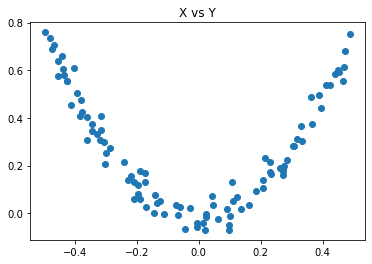

In [7]:
plt.scatter(df['X'],df['y'])
plt.title('X vs Y')

In [11]:
df['pred1'] = df['y'].mean()

In [12]:
df

,X,y,pred1
0,-0.125460,0.051573,0.265458
1,0.450714,0.594480,0.265458
2,0.231994,0.166052,0.265458
3,0.098658,-0.070178,0.265458
4,-0.343981,0.343986,0.265458
...,...,...,...
95,-0.006204,-0.040675,0.265458
96,0.022733,-0.002305,0.265458
97,-0.072459,0.032809,0.265458
98,-0.474581,0.689516,0.265458


In [13]:
df['res1'] = df['y']-df['pred1']

In [14]:
df

,X,y,pred1,res1
0,-0.125460,0.051573,0.265458,-0.213885
1,0.450714,0.594480,0.265458,0.329021
2,0.231994,0.166052,0.265458,-0.099407
3,0.098658,-0.070178,0.265458,-0.335636
4,-0.343981,0.343986,0.265458,0.078528
...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133
96,0.022733,-0.002305,0.265458,-0.267763
97,-0.072459,0.032809,0.265458,-0.232650
98,-0.474581,0.689516,0.265458,0.424057


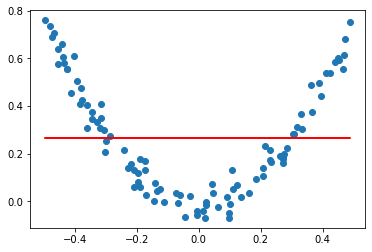

In [16]:
plt.scatter(df['X'],df['y'])
plt.plot(df['X'],df['pred1'],color='red')

In [15]:
from sklearn.tree import DecisionTreeRegressor

In [18]:
dt1 = DecisionTreeRegressor(max_leaf_nodes=8)

In [26]:
dt1.fit(df['X'].values.reshape(100,1),df['res1'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

In [27]:
from sklearn.tree import plot_tree

[Text(0.4090909090909091, 0.9166666666666666, 'X[0] <= -0.36\nsquared_error = 0.056\nsamples = 100\nvalue = -0.0'),
 Text(0.18181818181818182, 0.75, 'X[0] <= -0.43\nsquared_error = 0.012\nsamples = 18\nvalue = 0.309'),
 Text(0.09090909090909091, 0.5833333333333334, 'squared_error = 0.004\nsamples = 9\nvalue = 0.395'),
 Text(0.2727272727272727, 0.5833333333333334, 'squared_error = 0.005\nsamples = 9\nvalue = 0.222'),
 Text(0.6363636363636364, 0.75, 'X[0] <= 0.322\nsquared_error = 0.04\nsamples = 82\nvalue = -0.068'),
 Text(0.45454545454545453, 0.5833333333333334, 'X[0] <= -0.235\nsquared_error = 0.016\nsamples = 67\nvalue = -0.142'),
 Text(0.36363636363636365, 0.4166666666666667, 'squared_error = 0.003\nsamples = 12\nvalue = 0.041'),
 Text(0.5454545454545454, 0.4166666666666667, 'X[0] <= 0.211\nsquared_error = 0.009\nsamples = 55\nvalue = -0.182'),
 Text(0.45454545454545453, 0.25, 'X[0] <= -0.172\nsquared_error = 0.005\nsamples = 42\nvalue = -0.223'),
 Text(0.36363636363636365, 0.083333

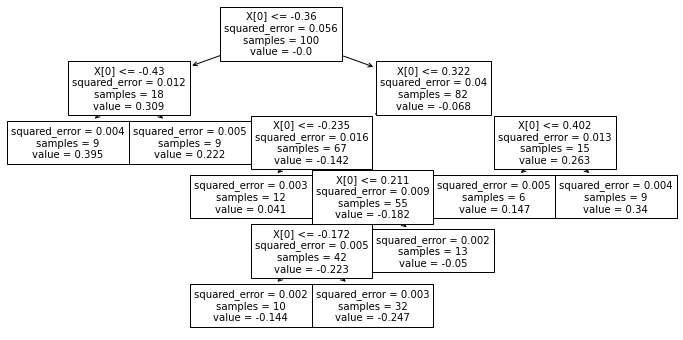

In [29]:
plt.figure(figsize = (12,6))
plot_tree(dt1)

In [31]:
df['pred2'] = df['pred1'] + dt1.predict(df['X'].values.reshape(100,1))

In [32]:
df

,X,y,pred1,res1,pred2
0,-0.125460,0.051573,0.265458,-0.213885,0.018320
1,0.450714,0.594480,0.265458,0.329021,0.605884
2,0.231994,0.166052,0.265458,-0.099407,0.215784
3,0.098658,-0.070178,0.265458,-0.335636,0.018320
4,-0.343981,0.343986,0.265458,0.078528,0.305965
...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.018320
96,0.022733,-0.002305,0.265458,-0.267763,0.018320
97,-0.072459,0.032809,0.265458,-0.232650,0.018320
98,-0.474581,0.689516,0.265458,0.424057,0.660912


In [33]:
# generating X_test
X_test = np.linspace(-0.5, 0.5, 500)

In [35]:
y_pred = 0.265458 + dt1.predict(X_test.reshape(500, 1))

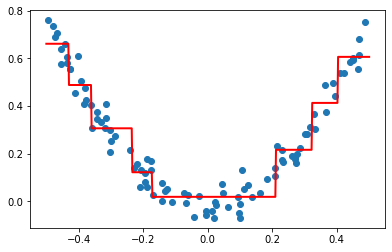

In [36]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth=2,color='red')
plt.scatter(df['X'],df['y'])

In [39]:
df['res2'] = df['y'] - df['pred2']

In [40]:
df

,X,y,pred1,res1,pred2,res2
0,-0.125460,0.051573,0.265458,-0.213885,0.018320,0.033253
1,0.450714,0.594480,0.265458,0.329021,0.605884,-0.011404
2,0.231994,0.166052,0.265458,-0.099407,0.215784,-0.049732
3,0.098658,-0.070178,0.265458,-0.335636,0.018320,-0.088497
4,-0.343981,0.343986,0.265458,0.078528,0.305965,0.038021
...,...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.018320,-0.058995
96,0.022733,-0.002305,0.265458,-0.267763,0.018320,-0.020624
97,-0.072459,0.032809,0.265458,-0.232650,0.018320,0.014489
98,-0.474581,0.689516,0.265458,0.424057,0.660912,0.028603


In [41]:
dt2 = DecisionTreeRegressor(max_leaf_nodes=8)

In [42]:
dt2.fit(df['X'].values.reshape(100,1),df['res2'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

[Text(0.3333333333333333, 0.9285714285714286, 'X[0] <= 0.47\nsquared_error = 0.003\nsamples = 100\nvalue = 0.0'),
 Text(0.2222222222222222, 0.7857142857142857, 'X[0] <= -0.46\nsquared_error = 0.003\nsamples = 98\nvalue = -0.002'),
 Text(0.1111111111111111, 0.6428571428571429, 'squared_error = 0.001\nsamples = 4\nvalue = 0.062'),
 Text(0.3333333333333333, 0.6428571428571429, 'X[0] <= -0.43\nsquared_error = 0.003\nsamples = 94\nvalue = -0.005'),
 Text(0.2222222222222222, 0.5, 'squared_error = 0.001\nsamples = 5\nvalue = -0.05'),
 Text(0.4444444444444444, 0.5, 'X[0] <= -0.397\nsquared_error = 0.003\nsamples = 89\nvalue = -0.002'),
 Text(0.3333333333333333, 0.35714285714285715, 'squared_error = 0.003\nsamples = 4\nvalue = 0.056'),
 Text(0.5555555555555556, 0.35714285714285715, 'X[0] <= 0.104\nsquared_error = 0.003\nsamples = 85\nvalue = -0.005'),
 Text(0.3333333333333333, 0.21428571428571427, 'X[0] <= -0.052\nsquared_error = 0.002\nsamples = 51\nvalue = -0.014'),
 Text(0.2222222222222222, 

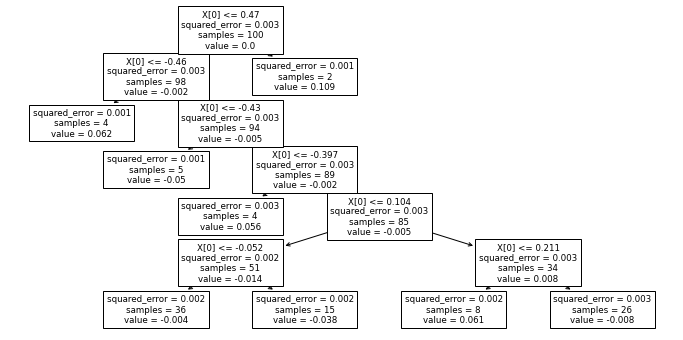

In [44]:
plt.figure(figsize = (12,6))
plot_tree(dt2)

In [47]:
df['pred3'] = df['pred1'] + df['pred2'] + dt1.predict(df['X'].values.reshape(100,1))

In [48]:
df

,X,y,pred1,res1,pred2,res2,pred3
0,-0.125460,0.051573,0.265458,-0.213885,0.018320,0.033253,0.036639
1,0.450714,0.594480,0.265458,0.329021,0.605884,-0.011404,1.211768
2,0.231994,0.166052,0.265458,-0.099407,0.215784,-0.049732,0.431568
3,0.098658,-0.070178,0.265458,-0.335636,0.018320,-0.088497,0.036639
4,-0.343981,0.343986,0.265458,0.078528,0.305965,0.038021,0.611929
...,...,...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.018320,-0.058995,0.036639
96,0.022733,-0.002305,0.265458,-0.267763,0.018320,-0.020624,0.036639
97,-0.072459,0.032809,0.265458,-0.232650,0.018320,0.014489,0.036639
98,-0.474581,0.689516,0.265458,0.424057,0.660912,0.028603,1.321825


In [50]:
y_pred = 0.265458 + dt1.predict(X_test.reshape(500, 1)) + dt2.predict(X_test.reshape(500,1))

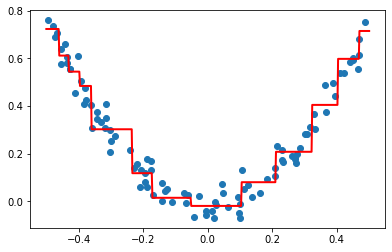

In [51]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth=2,color='red')
plt.scatter(df['X'],df['y'])